In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2. Implement the 10-armed Testbed

In [3]:
def get_bandit_function(bandits_means, bandits_sigma=1):
    def bandit_function(action):
        # function prototype with deviation, see https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.randn.html
        #return bandit_means[action] + (bandit_means[action]* np.random.randn(1))* bandits_sigma
        return np.random.normal(bandit_means[action], bandits_sigma)
    return bandit_function

In [4]:
bandit_means = np.array([-2.04402703,  0.78691329, -1.51854861, -0.74964035, 0.87538815, 1.51307674, -1.43232683, -0.62838404, -0.03584927, -0.29624793])
bnd_fc = get_bandit_function(bandit_means, bandits_sigma=1)
print(bnd_fc(action=4))


bnd_fc = get_bandit_function(np.zeros(10), bandits_sigma=1)
print(bnd_fc(action=4))


-0.638230683286
-1.43438812157


In [5]:
# 3. Implementation of a simple ϵ-greedy bandit algorithm

In [6]:
def get_average_rewards(epsilon=0.1, optimistic=0., nb_runs=2000, nb_steps=1000):
    Q_Avg = np.zeros(nb_steps)
    OA = np.zeros(nb_steps)
    for i in range(0, nb_runs):
        Q = np.full((10), optimistic) 
        N = np.zeros(10)
        bandit_mean = np.random.normal(1,1,10)
        optimal_action = np.argmax(bandit_mean)
       
        optimal_action_counter = 0
        bandit_func = get_bandit_function(bandit_mean)
        for j in range(nb_steps):
            #action = 0
            if (np.random.random() <= epsilon):
                #random exploration
                action = np.random.randint(0,10) 
            else:
                # greedy action
                action = np.argmax(Q)
                
            if (action == optimal_action):
                optimal_action_counter = optimal_action_counter +1
            OA[j] = OA[j] + optimal_action_counter 
            #print(OA)  
            N[action] = N[action] + 1
            reward = bandit_func(action)
            Q[action] = Q[action] + (1/N[action]) * (reward - Q[action])
            

            Q_Avg[j]= Q_Avg[j] + reward
              
            #Q_Avg[j] = Q_Avg[j] + ( (1/(i+1)) * (reward-Q_Avg[j]))
    for b in range(nb_steps):
        Q_Avg[b] = Q_Avg[b]/ nb_runs
        OA[b] = OA[b]/nb_runs 
    print OA
    return Q_Avg, OA
        # Q_Avg[nb_runs] = np.sum(Q) / len(Q)
        
    """
    Compute the average reward for different 10-armed bandit problems.
    
    Parameters
    ----------
    epsilon : float
        epsilon: probability of chosing a random action (exploration).
    optimistic: float
        Initial value value of all action-values.
    nb_runs: int
        Number of runs with different 10-armed bandits for the averaging.
    nb_steps: int
        Number of steps. How often each bandit is played.
    
    Returns
    -------
    numpy array (dtype: double)
        averaged rewards. i-th element in the array contains the average reward at iteration step i.
    numpy array (dtype: double)
        averaged percentage of using the optimal action. i-th element in the array contains the average reward at iteration step i.    
    """
    raise NotImplementedError()

In [7]:
avg_rewards_e01, optimal_actions_e01 = get_average_rewards(epsilon=0.1, optimistic=0.)
avg_rewards_e005, optimal_actions_e005 = get_average_rewards(epsilon=0.05, optimistic=0.)
avg_rewards_e001, optimal_actions_e001 = get_average_rewards(epsilon=0.01, optimistic=0.)
avg_rewards_greedy, optimal_actions_greedy = get_average_rewards(epsilon=0, optimistic=0.)

#avg_rewards_e01 = get_average_rewards(epsilon=0.1, optimistic=0.)
#avg_rewards_e005 = get_average_rewards(epsilon=0.05, optimistic=0.)
#avg_rewards_e001 = get_average_rewards(epsilon=0.01, optimistic=0.)
#avg_rewards_greedy = get_average_rewards(epsilon=0, optimistic=0.)
#print(avg_rewards_e001)
nb_steps = len(avg_rewards_e01)


[  0.0995   0.2      0.3035   0.409    0.5125   0.614    0.7135   0.8125
   0.9105   1.0105   1.106    1.206    1.3065   1.4055   1.5025   1.601
   1.703    1.806    1.903    2.007    2.112    2.2155   2.3175   2.4215
   2.5275   2.6325   2.727    2.821    2.9185   3.0125   3.1115   3.206
   3.3055   3.4045   3.507    3.607    3.7065   3.8125   3.91     4.011
   4.1105   4.203    4.3015   4.396    4.4935   4.5905   4.6875   4.7845
   4.8835   4.9855   5.087    5.1895   5.2925   5.389    5.4885   5.585
   5.6845   5.7825   5.88     5.977    6.0705   6.165    6.265    6.362
   6.4595   6.559    6.6565   6.7495   6.847    6.943    7.0405   7.13
   7.2225   7.315    7.41     7.506    7.5975   7.6935   7.783    7.879
   7.9685   8.066    8.1645   8.2625   8.363    8.4615   8.562    8.662
   8.752    8.8495   8.9485   9.0375   9.135    9.2295   9.327    9.421
   9.5125   9.603    9.696    9.7925   9.8905   9.986   10.0785  10.174
  10.2675  10.364   10.4595  10.546   10.6415  10.733   10.825

[  0.1095   0.2025   0.299    0.4      0.5015   0.6025   0.7      0.7965
   0.8935   0.994    1.0945   1.1935   1.2975   1.398    1.4985   1.598
   1.6965   1.7965   1.895    1.9915   2.0905   2.1875   2.2825   2.377
   2.4735   2.5695   2.6695   2.765    2.863    2.959    3.054    3.1465
   3.242    3.3405   3.437    3.5315   3.6285   3.721    3.8165   3.9145
   4.0155   4.114    4.219    4.319    4.4215   4.5245   4.6285   4.727
   4.829    4.9315   5.034    5.1345   5.235    5.3335   5.4335   5.537
   5.6365   5.741    5.8445   5.948    6.05     6.1545   6.2555   6.358
   6.462    6.564    6.666    6.767    6.867    6.971    7.072    7.1725
   7.2815   7.3855   7.4845   7.588    7.6895   7.7905   7.8935   7.993
   8.096    8.1935   8.2925   8.393    8.496    8.5995   8.6985   8.799
   8.8945   8.9945   9.0935   9.193    9.2915   9.392    9.487    9.584
   9.684    9.7825   9.881    9.976   10.076   10.1715  10.269   10.3705
  10.468   10.564   10.6615  10.759   10.858   10.9575  11.

[  9.50000000e-02   1.97000000e-01   3.06000000e-01   4.12000000e-01
   5.12500000e-01   6.17000000e-01   7.14500000e-01   8.12000000e-01
   9.11000000e-01   1.01200000e+00   1.11200000e+00   1.21100000e+00
   1.30850000e+00   1.40650000e+00   1.50400000e+00   1.60300000e+00
   1.70150000e+00   1.80100000e+00   1.90100000e+00   1.99850000e+00
   2.09800000e+00   2.19600000e+00   2.29400000e+00   2.39350000e+00
   2.49250000e+00   2.59150000e+00   2.69000000e+00   2.78800000e+00
   2.88750000e+00   2.98700000e+00   3.08650000e+00   3.18550000e+00
   3.28350000e+00   3.38200000e+00   3.48150000e+00   3.58100000e+00
   3.68000000e+00   3.77900000e+00   3.87850000e+00   3.97900000e+00
   4.07700000e+00   4.17600000e+00   4.27500000e+00   4.37450000e+00
   4.47450000e+00   4.57200000e+00   4.67300000e+00   4.77050000e+00
   4.86950000e+00   4.97100000e+00   5.07000000e+00   5.17050000e+00
   5.26950000e+00   5.37100000e+00   5.47250000e+00   5.57300000e+00
   5.67450000e+00   5.77600000e+00

[   0.1075    0.211     0.3125    0.4215    0.518     0.6165    0.717
    0.8185    0.9205    1.021     1.1225    1.224     1.3245    1.4255
    1.5265    1.6275    1.7285    1.8295    1.9305    2.0315    2.1325
    2.2335    2.3345    2.4355    2.5365    2.6375    2.7385    2.8395
    2.9405    3.0415    3.1425    3.2435    3.3445    3.4455    3.5465
    3.6475    3.7485    3.8495    3.9505    4.0515    4.1525    4.2535
    4.3545    4.4555    4.5565    4.6575    4.7585    4.8595    4.9605
    5.0615    5.1625    5.2635    5.3645    5.4655    5.5665    5.6675
    5.7685    5.8695    5.9705    6.0715    6.1725    6.2735    6.3745
    6.4755    6.5765    6.6775    6.7785    6.8795    6.9805    7.0815
    7.1825    7.2835    7.3845    7.4855    7.5865    7.6875    7.7885
    7.8895    7.9905    8.0915    8.1925    8.2935    8.3945    8.4955
    8.5965    8.6975    8.7985    8.8995    9.0005    9.1015    9.2025
    9.3035    9.4045    9.5055    9.6065    9.7075    9.8085    9.9095
   10.0

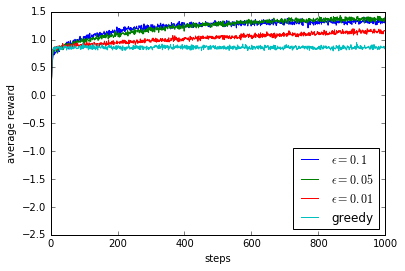

In [8]:
plt.plot(np.arange(nb_steps), avg_rewards_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), avg_rewards_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), avg_rewards_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), avg_rewards_greedy, label='greedy')

plt.legend(loc=4)
plt.xlabel("steps")
plt.ylabel("average reward")
plt.show()


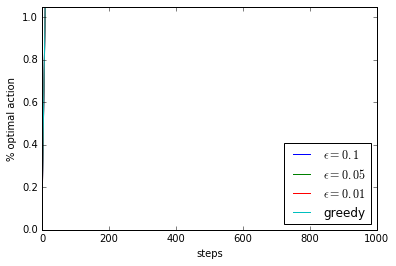

In [9]:
plt.plot(np.arange(nb_steps), optimal_actions_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), optimal_actions_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), optimal_actions_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), optimal_actions_greedy, label='greedy')

plt.legend(loc=4)
plt.ylim(0., 1.05)
plt.xlabel("steps")
plt.ylabel("% optimal action")
plt.show()

In [10]:
avg_rewards_e01, optimal_actions_e01 = get_average_rewards(epsilon=0.1, optimistic=2.)
avg_rewards_e005, optimal_actions_e005 = get_average_rewards(epsilon=0.05, optimistic=2.)
avg_rewards_e001, optimal_actions_e001 = get_average_rewards(epsilon=0.01, optimistic=2.)
avg_rewards_greedy, optimal_actions_greedy = get_average_rewards(epsilon=0, optimistic=2.)
#print(avg_rewards_e001)
nb_steps = len(avg_rewards_e01)

[  0.107    0.2115   0.2905   0.401    0.489    0.59     0.6925   0.789
   0.884    0.981    1.078    1.181    1.28     1.378    1.473    1.574
   1.6735   1.77     1.867    1.965    2.0645   2.1595   2.263    2.3615
   2.4595   2.556    2.6585   2.759    2.858    2.9635   3.0575   3.1545
   3.2565   3.3585   3.45     3.5545   3.6535   3.757    3.859    3.9595
   4.057    4.158    4.258    4.3615   4.46     4.5575   4.6555   4.756
   4.8555   4.9565   5.0655   5.1645   5.268    5.3695   5.4695   5.573
   5.672    5.7695   5.864    5.9655   6.0655   6.167    6.269    6.3735
   6.474    6.574    6.677    6.7745   6.8715   6.969    7.069    7.1685
   7.2695   7.3735   7.474    7.572    7.6715   7.7715   7.8705   7.969
   8.0695   8.1685   8.2685   8.3695   8.468    8.5745   8.6745   8.776
   8.88     8.9725   9.0685   9.1655   9.2685   9.367    9.466    9.571
   9.669    9.763    9.8645   9.9655  10.0635  10.16    10.2545  10.349
  10.451   10.545   10.6405  10.741   10.839   10.938   11.

[   0.104     0.2085    0.3005    0.4055    0.499     0.605     0.7075
    0.8055    0.8975    0.9975    1.104     1.201     1.306     1.408
    1.501     1.5945    1.6925    1.792     1.893     1.997     2.0985
    2.202     2.3       2.409     2.516     2.6185    2.72      2.82
    2.922     3.0225    3.1215    3.2245    3.3275    3.4275    3.532
    3.634     3.734     3.837     3.937     4.039     4.138     4.2355
    4.334     4.4345    4.5315    4.633     4.731     4.828     4.9315
    5.0305    5.132     5.234     5.3345    5.4325    5.5285    5.628
    5.727     5.825     5.9245    6.028     6.127     6.225     6.33
    6.4305    6.526     6.6235    6.724     6.8235    6.922     7.0235
    7.1245    7.2275    7.329     7.429     7.5285    7.627     7.7255
    7.824     7.9255    8.025     8.1255    8.2215    8.3155    8.413
    8.5125    8.61      8.7075    8.808     8.91      9.008     9.1055
    9.2045    9.304     9.4015    9.4965    9.597     9.698     9.7985
    9.896     

[  9.40000000e-02   1.98500000e-01   2.94000000e-01   3.98000000e-01
   4.93500000e-01   5.90000000e-01   6.85000000e-01   7.96500000e-01
   8.97000000e-01   9.94000000e-01   1.09800000e+00   1.19600000e+00
   1.29950000e+00   1.40100000e+00   1.51000000e+00   1.61400000e+00
   1.72050000e+00   1.81950000e+00   1.92550000e+00   2.02950000e+00
   2.13650000e+00   2.24300000e+00   2.34700000e+00   2.45050000e+00
   2.55100000e+00   2.65300000e+00   2.75350000e+00   2.85850000e+00
   2.96250000e+00   3.06650000e+00   3.16900000e+00   3.27050000e+00
   3.37350000e+00   3.47750000e+00   3.57850000e+00   3.67850000e+00
   3.78000000e+00   3.88000000e+00   3.97800000e+00   4.07700000e+00
   4.18000000e+00   4.28250000e+00   4.38300000e+00   4.48500000e+00
   4.58400000e+00   4.68400000e+00   4.78500000e+00   4.88400000e+00
   4.98300000e+00   5.08150000e+00   5.18000000e+00   5.27900000e+00
   5.37950000e+00   5.47900000e+00   5.58150000e+00   5.68050000e+00
   5.77900000e+00   5.87950000e+00

[  8.95000000e-02   1.91500000e-01   2.90500000e-01   3.93000000e-01
   4.77500000e-01   5.76000000e-01   6.85000000e-01   7.89000000e-01
   8.96500000e-01   1.00050000e+00   1.10900000e+00   1.20800000e+00
   1.31050000e+00   1.41300000e+00   1.51050000e+00   1.60650000e+00
   1.71000000e+00   1.81150000e+00   1.91450000e+00   2.01500000e+00
   2.11050000e+00   2.20700000e+00   2.30350000e+00   2.39950000e+00
   2.49650000e+00   2.59200000e+00   2.68750000e+00   2.78000000e+00
   2.87350000e+00   2.97050000e+00   3.06700000e+00   3.16350000e+00
   3.26000000e+00   3.35700000e+00   3.45600000e+00   3.55550000e+00
   3.65250000e+00   3.75100000e+00   3.84900000e+00   3.94700000e+00
   4.04600000e+00   4.14400000e+00   4.24100000e+00   4.33850000e+00
   4.43650000e+00   4.53450000e+00   4.63200000e+00   4.73000000e+00
   4.82750000e+00   4.92600000e+00   5.02450000e+00   5.12200000e+00
   5.21950000e+00   5.31850000e+00   5.41600000e+00   5.51350000e+00
   5.61100000e+00   5.70850000e+00

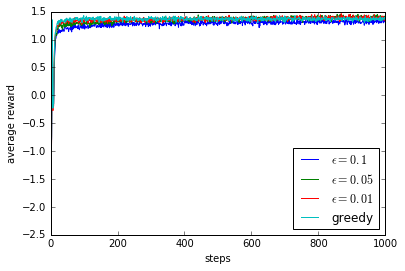

In [11]:
plt.plot(np.arange(nb_steps), avg_rewards_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), avg_rewards_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), avg_rewards_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), avg_rewards_greedy, label='greedy')

plt.legend(loc=4)

plt.xlabel("steps")
plt.ylabel("average reward")
plt.show()

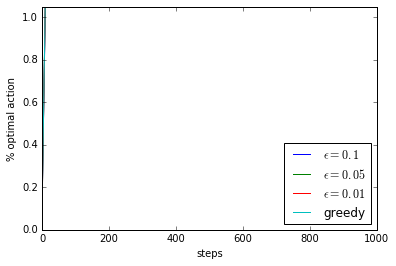

In [12]:
plt.plot(np.arange(nb_steps), optimal_actions_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), optimal_actions_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), optimal_actions_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), optimal_actions_greedy, label='greedy')

plt.legend(loc=4)
plt.ylim(0., 1.05)
plt.xlabel("steps")
plt.ylabel("% optimal action")
plt.show()